** Movielens Case Study **

DESCRIPTION

Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Analysis Tasks to be performed:-

* Import the three datasets

* Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

* Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
  1. User Age Distribution
  2. User rating of the movie “Toy Story”
  3. Top 25 movies by viewership rating
  4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

* Feature Engineering:
  Use column genres:
  1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out      only the unique categories of genres)
  2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that  genre. 
  3. Determine the features affecting the ratings of any particular movie.
  4. Develop an appropriate model to predict the movie ratings

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [102]:
movies = pd.read_csv("movies.csv", names=['MovieID', 'Title', 'Genres'] , delimiter="::", error_bad_lines = False)

In [103]:
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [104]:
ratings = pd.read_csv("ratings.csv", names=['UserID', 'MovieID', 'Rating', 'Timestamp'] , delimiter="::", error_bad_lines = False)

In [105]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [106]:
users = pd.read_csv("users.csv", names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'] , delimiter="::", error_bad_lines = False)

In [107]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [108]:
movies.shape

(3883, 3)

In [109]:
ratings.shape

(1000209, 4)

In [110]:
df1 = movies.merge(ratings,on='MovieID',how='inner')
df1.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [111]:
df1.shape

(1000209, 6)

In [112]:
users.shape

(6040, 5)

In [113]:
master = df1.merge(users,on='UserID',how='inner')
master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [114]:
master.shape

(1000209, 10)

* Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
  1. User Age Distribution-

In [115]:
master['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

In [116]:
# Percentage of age distribution.
master['Age'].value_counts()/ len(master) * 100

25    39.547335
35    19.896142
18    18.349765
45     8.361552
50     7.247485
56     3.877190
1      2.720531
Name: Age, dtype: float64

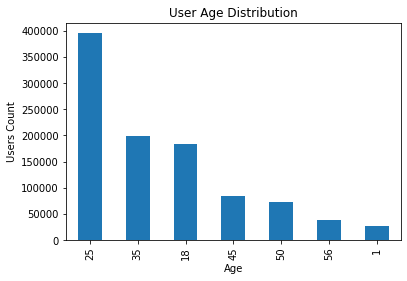

In [117]:
master['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel("Users Count")
plt.show()

* Age wise distribution-
*00-18 = 02.720531%
*18-24 = 18.349765%
*25-34 = 39.547335% 
*35-44 = 19.896142%
*45-49 = 08.361552%
*50-55 = 07.247485%
*56+   = 03.877190%
 
1. Here we can see thet 20% users are below 25 yrs of age.
2. Age group 25-34 contains around 40% of users.
3. 90% users are below 50 yrs of age.

* Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
  2. User rating of the movie “Toy Story”

In [118]:
toystory = master[master['Title'].str.contains('Toy Story') == True]

In [119]:
toystory

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


In [120]:
toystory.shape

(3662, 10)

In [121]:
toystory.groupby(["Title","Rating"]).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

In [122]:
toystory.groupby(["Title","Rating"]).size()/len(toystory)*100

Title               Rating
Toy Story (1995)    1          0.436920
                    2          1.665756
                    3          9.421081
                    4         22.801748
                    5         22.392135
Toy Story 2 (1999)  1          0.682687
                    2          1.201529
                    3          5.843801
                    4         15.783725
                    5         19.770617
dtype: float64

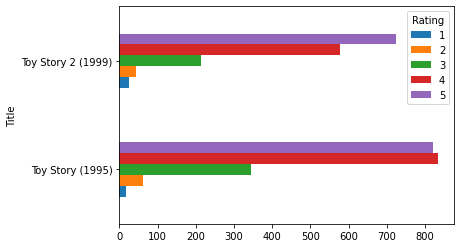

In [123]:
toystory.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

Conclusion-
80% of users gave 4 or 5 rating to both Toy Story movies.

* Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
  3. Top 25 movies by viewership rating

In [124]:
top25 = master.groupby('Title').size().sort_values(ascending=False)[:25]
top25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

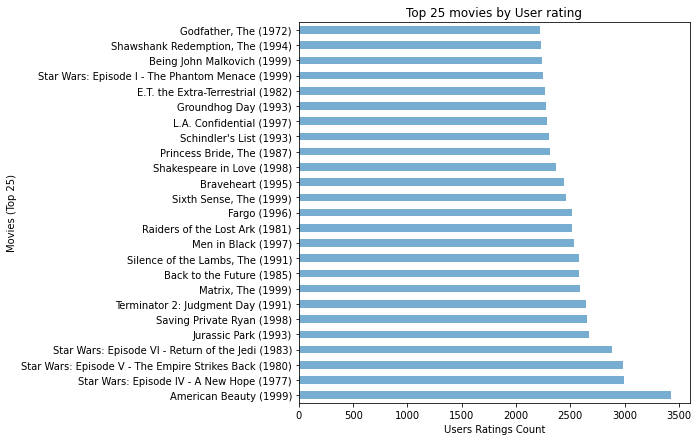

In [125]:
top25.plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel("Users Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by User rating")
plt.show()

Conclusion- American Beauty (1999) recived most number of user rating. 3428 users watched American Beauty.

* Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
  4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [126]:
user2696 = master[master["UserID"] == 2696]
user2696

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


In [127]:
user2696.value_counts().sum()

20

Conclusion- User 2696 gave ratings to 20 Movies.

* Feature Engineering:
  Use column genres:
  1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [128]:
genres = master['Genres'].str.split("|")

In [129]:
genres

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Genres, Length: 1000209, dtype: object

In [130]:
listgenres = set()
for genre in genres:
    listgenres = listgenres.union(set(genre))

In [131]:
listgenres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [132]:
len(listgenres)

18

Conclusion- There are total 18 Genres.

* 2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [133]:
ratingsOneHot = master['Genres'].str.get_dummies("|")

In [134]:
ratingsOneHot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [135]:
master = pd.concat([master,ratingsOneHot],axis=1)

In [136]:
master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


In [137]:
master.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [138]:
master.to_csv("Final_Master.csv")

* 3. Determine the features affecting the ratings of any particular movie.

In [139]:
master[["title","Year"]] = master.Title.str.extract("(.)\s\((.\d+)",expand=True)

In [140]:
master = master.drop(columns=["title"])
master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,1,0,1,0,0,0,0,1995
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,0,1,0,0,0,1977
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,1,0,1993


In [141]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 29 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   MovieID      1000209 non-null  int64 
 1   Title        1000209 non-null  object
 2   Genres       1000209 non-null  object
 3   UserID       1000209 non-null  int64 
 4   Rating       1000209 non-null  int64 
 5   Timestamp    1000209 non-null  int64 
 6   Gender       1000209 non-null  object
 7   Age          1000209 non-null  int64 
 8   Occupation   1000209 non-null  int64 
 9   Zip-code     1000209 non-null  object
 10  Action       1000209 non-null  int64 
 11  Adventure    1000209 non-null  int64 
 12  Animation    1000209 non-null  int64 
 13  Children's   1000209 non-null  int64 
 14  Comedy       1000209 non-null  int64 
 15  Crime        1000209 non-null  int64 
 16  Documentary  1000209 non-null  int64 
 17  Drama        1000209 non-null  int64 
 18  Fantasy      1000209 n

In [142]:
master['Year'] = master.Year.astype(int)

In [143]:
master['Movie_Age'] = 2022 - master.Year
master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,27
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,0,1,0,0,0,0,1995,27
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,27
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,1,0,0,0,1977,45
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,1,0,1993,29


In [144]:
master['Gender'] = master.Gender.str.replace('F','1')

In [145]:
master['Gender'] = master.Gender.str.replace('M','0')

In [146]:
master['Gender'] = master.Gender.astype(int)

In [147]:
master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,27
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,27
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,27
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,45
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,29


In [148]:
genderaffect = master.groupby('Gender').size().sort_values(ascending=False)[:25]
genderaffect

Gender
0    753769
1    246440
dtype: int64

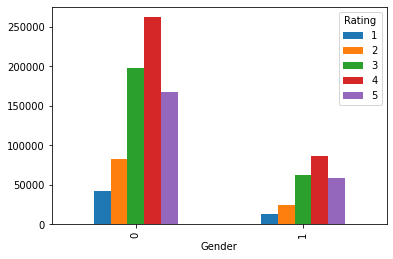

In [149]:
master.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

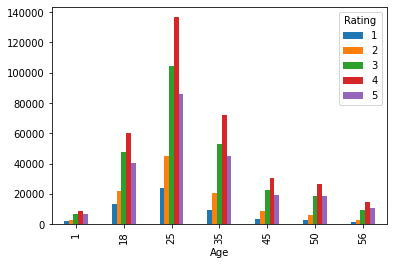

In [150]:
master.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

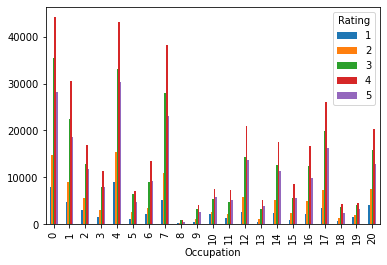

In [151]:
master.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

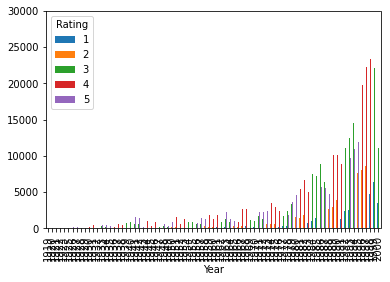

In [152]:
master.groupby(["Year","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

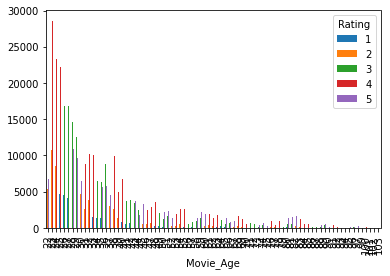

In [153]:
master.groupby(["Movie_Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

* 4. Develop an appropriate model to predict the movie ratings.

In [154]:
first_500 = master[:1000]

In [155]:
first_500

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,27
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,27
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,27
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,45
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2384,Babe: Pig in the City (1998),Children's|Comedy,18,2,978155233,1,18,3,95825,...,0,0,0,0,0,0,0,0,1998,24
996,2391,"Simple Plan, A (1998)",Crime|Thriller,18,1,978155685,1,18,3,95825,...,0,0,0,0,0,1,0,0,1998,24
997,2394,"Prince of Egypt, The (1998)",Animation|Musical,18,4,978154907,1,18,3,95825,...,0,1,0,0,0,0,0,0,1998,24
998,2402,Rambo: First Blood Part II (1985),Action|War,18,2,978153894,1,18,3,95825,...,0,0,0,0,0,0,1,0,1985,37


In [156]:
features = first_500[['MovieID','Age','Occupation']].values

In [157]:
labels = first_500[['Rating']].values

In [158]:
features

array([[   1,    1,   10],
       [  48,    1,   10],
       [ 150,    1,   10],
       ...,
       [2394,   18,    3],
       [2402,   18,    3],
       [2404,   18,    3]], dtype=int64)

In [159]:
labels

array([[5],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [3],
       [4],
       [3],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [5],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [2],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [3],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [3],
       [3],
    

In [160]:
# machine learning
from sklearn.model_selection import train_test_split

In [161]:
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.33,random_state=42)

In [162]:
x_train

array([[3035,   35,    1],
       [1393,   25,   17],
       [3198,   35,    1],
       ...,
       [1073,   18,    3],
       [ 784,   35,    1],
       [2802,   50,    9]], dtype=int64)

In [163]:
x_test

array([[1265,   35,    1],
       [3408,   35,    1],
       [3447,   35,    1],
       [2423,   35,    1],
       [ 539,   35,    1],
       [2657,   35,    1],
       [2109,   35,    1],
       [1247,   35,    1],
       [1064,   18,    3],
       [ 105,   25,   12],
       [ 421,   18,    3],
       [1035,   50,    9],
       [2140,   35,    1],
       [2140,   18,    3],
       [2000,   18,    3],
       [1527,   18,    3],
       [ 508,   25,   17],
       [1275,   18,    3],
       [3704,   35,    1],
       [1653,   25,   17],
       [1380,   35,    1],
       [1027,   25,   12],
       [   7,   35,    1],
       [1282,   35,    1],
       [2006,   25,   12],
       [2712,   25,   12],
       [2506,   50,    9],
       [2278,   18,    3],
       [1562,   18,    3],
       [2021,   18,    3],
       [3114,   25,   17],
       [ 150,   25,   12],
       [2094,   35,    1],
       [1203,   35,    1],
       [   2,   35,    1],
       [1693,   25,   12],
       [2795,   35,    1],
 

In [164]:
y_train

array([[3],
       [3],
       [3],
       [3],
       [5],
       [5],
       [2],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [5],
       [4],
       [5],
       [5],
       [3],
       [3],
       [3],
       [5],
       [4],
       [3],
       [4],
       [4],
       [4],
       [3],
       [5],
       [5],
       [4],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [4],
       [5],
       [3],
       [5],
       [3],
       [5],
       [4],
       [5],
       [3],
       [5],
       [4],
       [4],
       [3],
       [3],
       [4],
       [4],
       [4],
       [3],
       [5],
       [5],
       [5],
       [4],
       [4],
       [5],
       [4],
       [4],
       [3],
       [5],
       [5],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
    

In [165]:
y_test

array([[5],
       [4],
       [5],
       [5],
       [5],
       [4],
       [4],
       [3],
       [2],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [3],
       [5],
       [2],
       [4],
       [5],
       [4],
       [4],
       [5],
       [3],
       [3],
       [3],
       [3],
       [1],
       [4],
       [4],
       [4],
       [4],
       [3],
       [5],
       [3],
       [3],
       [4],
       [1],
       [2],
       [5],
       [3],
       [3],
       [5],
       [4],
       [3],
       [1],
       [3],
       [4],
       [1],
       [4],
       [5],
       [3],
       [2],
       [3],
       [4],
       [5],
       [3],
       [3],
       [1],
       [4],
       [4],
       [5],
       [5],
       [5],
       [4],
       [5],
       [1],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [4],
       [3],
       [5],
       [3],
       [4],
       [3],
       [3],
    

In [166]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [167]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

36.72

In [168]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [169]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [170]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [171]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0

In [172]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest','Decision Tree'],
    'Score': [ acc_log, acc_random_forest, acc_decision_tree]})
models

,Model,Score
0,Logistic Regression,36.72
1,Random Forest,100.00
2,Decision Tree,100.00


In [173]:
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,100.00
2,Decision Tree,100.00
0,Logistic Regression,36.72
